In [30]:
import numpy as np
from numpy.linalg import inv
from scipy import stats
from scipy.linalg import sqrtm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
#IMPORT THE fun.py

In [31]:
Bhat_d_dict = {}


period_display = 6
T = 6190 + 66
K = 3
Bhat_estimated = np.load("Bhat.npy")



Ad = Bhat_estimated[:,:K]
Aw = Bhat_estimated[:,K:K*2]
Am = Bhat_estimated[:,K*2:K*3]
Aq = Bhat_estimated[:,K*3:]


Ad[0,0] = 1
Ad[1,1] = 1

u0=np.random.normal(0, 1, T)
u1=np.random.normal(0, 1, T)
u2=np.random.normal(0, 1, T)
u=np.array([u0,u1,u2]).T

w = np.zeros(K)
w0 = np.zeros(K)
w1 = np.zeros(K)

y_d_l = np.zeros((T,K))
y_d_l[:66,:]=np.array([np.random.uniform(-1,1),
            np.random.uniform(-1,1),
            np.random.uniform(-1,1)]).T

y_d_l = np.zeros((T,K))
for t in range(66,T):
    for j in range(K):
        w0[j] = np.mean(y_d_l[t-5:t-1,j])
        w1[j] = np.mean(y_d_l[t-22:t-5,j])
        w[j] = np.mean(y_d_l[t-66:t-22,j])
    y_d_l[t,:] = np.dot(Ad,y_d_l[t-1,:]) + np.dot(Aw,y_d_l[t-5,:]) + np.dot(Am,y_d_l[t-22,:]) + np.dot(Aq,y_d_l[t-66,:]) + u[t,:]
y_d_l = y_d_l[66:,:]

In [32]:
y_w_l = y_d_l[::5]

y_m_l = y_d_l[::22]

y_q_l = y_d_l[::66]






T = y_d_l.shape[0]
W = y_w_l.shape[0]
M = y_m_l.shape[0]
Q = y_q_l.shape[0]


_, aic_d, _, bic_d = inf_criteria(y_d_l, 10, 0)
_, aic_w, _, bic_w = inf_criteria(y_w_l, 10, 0)
_, aic_m, _, bic_m = inf_criteria(y_m_l[:,:], 10, 0)
_, aic_q, _, bic_q = inf_criteria(y_q_l[:,:], 10, 0)


p_d=bic_d
inc=0

p_w=1*5*3
[Bhat_w,Sigmahat_w,Uhat_w,Traw_w,K,Z_w,corr_w_original,corr_mean_w]=VARls(y_w_l[:,:],p_w,inc)

p_m=1*3
[Bhat_m,Sigmahat_m,Uhat_m,Traw_m,K,Z_m,corr_m_original,corr_mean_m]=VARls(y_m_l[:,:],p_m,inc)

p_q=1
[Bhat_q,Sigmahat_q,Uhat_q,Traw_q,K,Z_q,corr_q_original,corr_mean_q]=VARls(y_q_l[:,:],p_q,inc)




Bhat_dh, Bhat_d2,Bhat_d3,Bhat_d4,_,_,_,_,_,_,_,_, Sigmahat_dh, Uhat_dh ,_ ,_ ,_ ,corr_d_original ,_ = HVARls1(y_d_l, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)




Uhat_d_hvar = Uhat_dh
Sigmahat_d = Sigmahat_dh





x_s = ['Daily', 'Weekly', 'Monthly', 'Quarterly']



W_d = 4
M_d = 21
Q_d = 65
Q_d2 = 131

Bhat_d = Bhat_dh


for i in range(W_d):
    if i == 0:
        Bhet_0 = Bhat_d[:,K:2*K]
    else:
        Bhet_0 = np.hstack((Bhet_0, Bhat_d[:,K:2*K]))

for i in range(M_d-W_d):
    if i == 0:
        Bhet_1 = Bhat_d[:,2*K:3*K]
    else:
        Bhet_1 = np.hstack((Bhet_1,Bhat_d[:,2*K:3*K]))

for i in range(Q_d-M_d):
    if i == 0:
        Bhet_2 = Bhat_d[:,3*K:4*K]
    else:
        Bhet_2 = np.hstack((Bhet_2,Bhat_d[:,3*K:4*K]))


B = np.hstack(( np.hstack((Bhet_0,Bhet_1)), Bhet_2))


Bhat_d = np.hstack((Bhat_d[:,:K],B))

Bhat_d_b = Bhat_d

#Test significance:
corr_matrix_d = (np.array([pd.DataFrame(Uhat_d_hvar.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)
corr_matrix_w = (np.array([pd.DataFrame(Uhat_w.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)
corr_matrix_m = (np.array([pd.DataFrame(Uhat_m.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)
corr_matrix_q = (np.array([pd.DataFrame(Uhat_q.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)




print(np.mean(abs(corr_matrix_d)))
print(np.mean(abs(corr_matrix_w)))
print(np.mean(abs(corr_matrix_m)))
print(np.mean(abs(corr_matrix_q)))

print(Sigmahat_dh)
print(Sigmahat_w)
print(Sigmahat_m)
print(Sigmahat_q)

0.00798715206666801
0.06637962832742263
0.19742845862599553
0.3120384292677995
[[ 1.00695146  0.00586205  0.00189302]
 [ 0.00586205  1.0092345  -0.0165393 ]
 [ 0.00189302 -0.0165393   1.0173061 ]]
[[ 4.93415858  0.15443387 -0.18886077]
 [ 0.15443387  4.93189269  0.28659278]
 [-0.18886077  0.28659278  1.63116704]]
[[23.20889216  3.57570778 -0.70431373]
 [ 3.57570778 21.57992517  1.98632562]
 [-0.70431373  1.98632562  1.73939134]]
[[75.05522142 24.36299351 -0.22822092]
 [24.36299351 62.76638938  7.37942549]
 [-0.22822092  7.37942549  2.70855618]]


In [34]:
%%capture test
Bs = 100

corr_bootstrap = np.zeros((4,Bs + 1))

corr_bootstrap[0,0] = np.sum(corr_matrix_d**2)*2
corr_bootstrap[1,0] = np.sum(corr_matrix_w**2)*2
corr_bootstrap[2,0] = np.sum(corr_matrix_m**2)*2
corr_bootstrap[3,0] = np.sum(corr_matrix_q**2)*2

p_d = 1

for b in range(1,Bs):
    print(b)
    y_d_l_b = np.zeros((y_d_l.shape))

    U_bar = np.zeros(K)
    for k in range(K):
        U_bar[k]=(np.mean(Uhat_d_hvar[k,:]))
        U_s = np.zeros((Uhat_d_hvar.shape))
    for i in range(Uhat_d_hvar.shape[1]):
        U_s[:,i]=Uhat_dh[:,i].T-U_bar

    U_star = np.zeros((K,T))
    for k in range(K):
        U_star[k,:] = np.random.choice(U_s[k,:], size=T, replace=True)


    y_d_l_b[:p_d*66,:] = y_d_l[:p_d*66,:]

    Z_b = np.zeros((K*66*p_d, T - 66*0))
    Z_b[:,0] = np.reshape(y_d_l[:p_d*66,:][::-1], (-K*66*p_d) )
    for t in range(p_d*66,T):
        y_d_l_b[t,:] = np.dot(Bhat_d_b,Z_b[:,t-p_d*66]) + U_star[:,t]
        Z_b[:,t+1-p_d*66] = np.reshape(y_d_l_b[t+1-p_d*66:t+1,:][::-1], (-K*66*p_d) )



    y_w_l_b = y_d_l_b[::5]

    y_m_l_b = y_d_l_b[::22]

    y_q_l_b = y_d_l_b[::66]





    T = y_d_l_b.shape[0]
    W = y_w_l_b.shape[0]
    M = y_m_l_b.shape[0]
    Q = y_q_l_b.shape[0]



    inc=0

    p_w=1*5*3
    [Bhat_w,Sigmahat_w,Uhat_w,Traw_w,K,Z_w,corr_w_original,corr_mean_w]=VARls(y_w_l_b[:,:],p_w,inc)

    p_m=1*3
    [Bhat_m,Sigmahat_m,Uhat_m,Traw_m,K,Z_m,corr_m_original,corr_mean_m]=VARls(y_m_l_b[:,:],p_m,inc)

    p_q=1
    [Bhat_q,Sigmahat_q,Uhat_q,Traw_q,K,Z_q,corr_q_original,corr_mean_q]=VARls(y_q_l_b[:,:],p_q,inc)




    Bhat_dh, Bhat_d2,Bhat_d3,Bhat_d4,_,_,_,_,_,_,_,_, Sigmahat_dh, Uhat_dh ,_ ,_ ,_ ,corr_d_original ,_ = HVARls1(y_d_l_b, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

    Uhat_d_hvar = Uhat_dh
    Sigmahat_d = Sigmahat_dh

    corr_matrix_d = (np.array([pd.DataFrame(Uhat_d_hvar.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)
    corr_matrix_w = (np.array([pd.DataFrame(Uhat_w.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)
    corr_matrix_m = (np.array([pd.DataFrame(Uhat_m.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)
    corr_matrix_q = (np.array([pd.DataFrame(Uhat_q.T).corr().to_numpy()[np.triu_indices(K, 1)[::-1]]] ).T)

    # corr_bootstrap[0,b] = np.sum(corr_matrix_d**2)
    # corr_bootstrap[1,b] = np.sum(corr_matrix_w**2)
    # corr_bootstrap[2,b] = np.sum(corr_matrix_m**2)
    # corr_bootstrap[3,b] = np.sum(corr_matrix_q**2)

    corr_bootstrap[0,b] = np.sum(corr_matrix_d**2)*2
    corr_bootstrap[1,b] = np.sum(corr_matrix_w**2)*2
    corr_bootstrap[2,b] = np.sum(corr_matrix_m**2)*2
    corr_bootstrap[3,b] = np.sum(corr_matrix_q**2)*2
    print(b)



crit_val_d = r_to_z(corr_d_original, T, 0.95)
crit_val_w = r_to_z(corr_w_original, W, 0.95)
crit_val_m = r_to_z(corr_m_original, M, 0.95)
crit_val_q = r_to_z(corr_q_original, Q, 0.95)


corr_bootstrap[0,0] = np.mean(corr_bootstrap[0,1:])
corr_bootstrap[1,0] = np.mean(corr_bootstrap[1,1:])
corr_bootstrap[2,0] = np.mean(corr_bootstrap[2,1:])
corr_bootstrap[3,0] = np.mean(corr_bootstrap[3,1:])


conf = 95
k = 1
vec_corr = np.array([corr_bootstrap[0,0],corr_bootstrap[1,0],corr_bootstrap[2,0],corr_bootstrap[3,0]])
std = np.zeros((2,4))
std[:,0] = [np.percentile(corr_bootstrap[0,:], conf) - corr_bootstrap[0,0], - np.percentile(corr_bootstrap[0,:], 100 - conf) + corr_bootstrap[0,0]]
std[:,1] = [np.percentile(corr_bootstrap[1,:], conf) - corr_bootstrap[1,0], - np.percentile(corr_bootstrap[1,:], 100 - conf) + corr_bootstrap[1,0]]
std[:,2] = [np.percentile(corr_bootstrap[2,:], conf) - corr_bootstrap[2,0], - np.percentile(corr_bootstrap[2,:], 100 - conf) + corr_bootstrap[2,0]]
std[:,3] = [np.percentile(corr_bootstrap[3,:], conf) - corr_bootstrap[3,0], - np.percentile(corr_bootstrap[3,:], 100 - conf) + corr_bootstrap[3,0]]

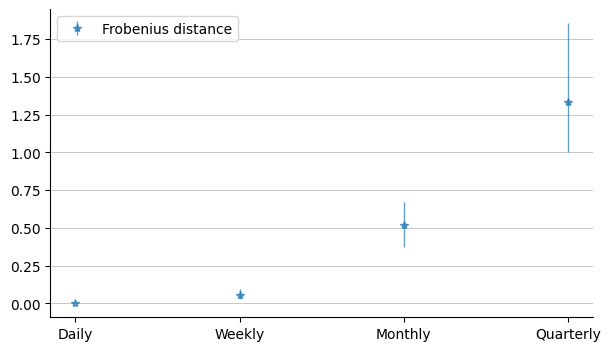

In [35]:
fig, ax = plt.subplots(figsize = (7, 4))
ax.errorbar(x_s, vec_corr, yerr=[std[1,:],std[0,:]], fmt = "*", alpha = 0.7, lw = 1, label='Frobenius distance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, linewidth=0.5)
ax.legend(fontsize = 10, loc = 'upper left')
ax.set_title('', fontweight='bold')
plt.show()